In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
from cartopy.mpl.geoaxes import GeoAxes
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
from matplotlib import ticker
import matplotlib.patches as mpatches

from satpy import Scene, find_files_and_readers
from satpy.writers import get_enhanced_image
from datetime import datetime
import numpy as np
from satpy import MultiScene


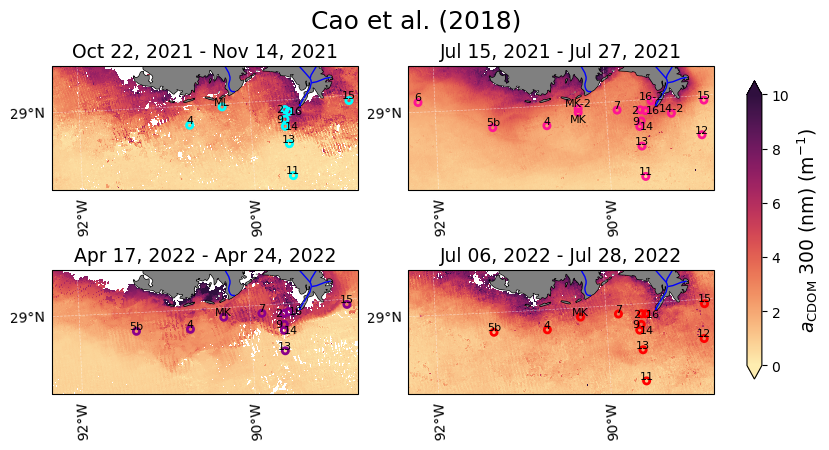

In [13]:
###300 nm
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=29.3
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(8.2, 4.4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM300.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=10, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
                
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 0 and c == 'SU21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                           edgecolors='cyan',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
            elif i == 1 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='deeppink',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == 'MK':
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9' and name != 'MK':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)            
            elif i == 2 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='darkmagenta',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)               
            elif i == 3 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='red',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)              
 
            else:
                pass
     
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('$a_{\mathrm{CDOM}}$ 300 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task6/StationMeans300nm.png')

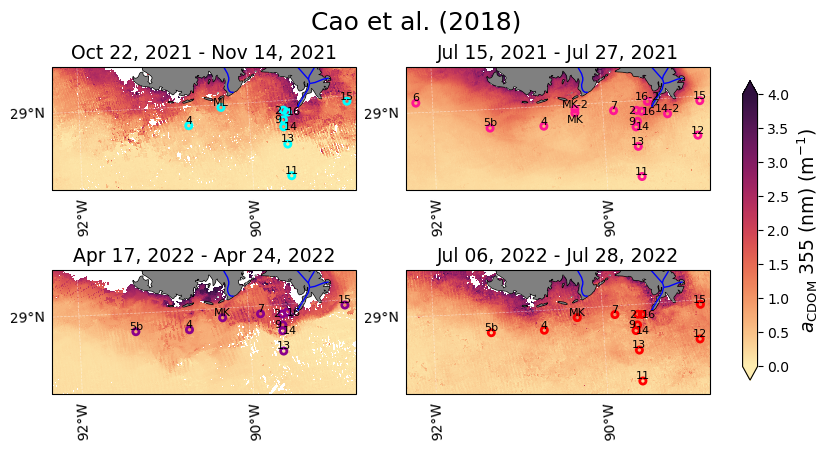

In [14]:
###355nm
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=29.3
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(8.2, 4.4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM355.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=4, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
                
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 0 and c == 'SU21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                           edgecolors='cyan',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
            elif i == 1 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='deeppink',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == 'MK':
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9' and name != 'MK':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)            
            elif i == 2 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='darkmagenta',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)               
            elif i == 3 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='red',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)              
 
            else:
                pass
     
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('$a_{\mathrm{CDOM}}$ 355 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task6/StationMeans355nm.png')

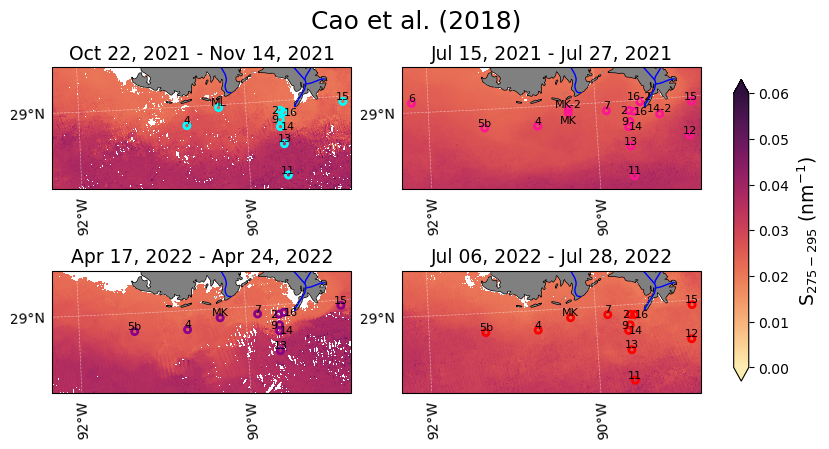

In [15]:
###S275-295
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=29.3
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(8.2, 4.4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.S275_295.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=0.06, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
                
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 0 and c == 'SU21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                           edgecolors='cyan',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
            elif i == 1 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='deeppink',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == 'MK':
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9' and name != 'MK':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)            
            elif i == 2 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='darkmagenta',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)               
            elif i == 3 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='red',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)              
 
            else:
                pass
     
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('S$_{275-295}$ (nm$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task6/StationMeansS275_295.png')

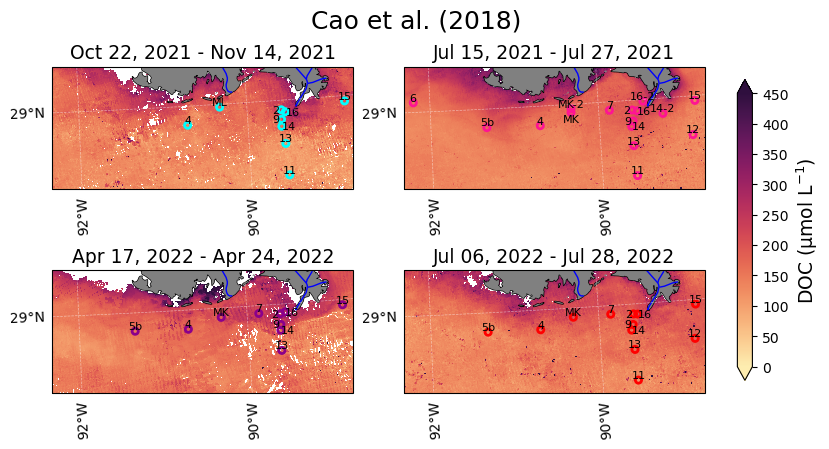

In [16]:
###DOC
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=29.3
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(8.2, 4.4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.DOC.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=450, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
                
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        
        circlesize = 20
        edgesize = 2
        fontsize = 8
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 0 and c == 'SU21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                           edgecolors='cyan',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
            elif i == 1 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='deeppink',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == 'MK':
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9' and name != 'MK':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)            
            elif i == 2 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='darkmagenta',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)               
            elif i == 3 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                ax.scatter(lons, lats, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                           edgecolors='red',
                           linewidth=edgesize)
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2' or name == '9':
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name == '16' or name == '14':
                        ax.text(x, y, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize)
                    elif name != '2' and name != '14' and name != '16' and name != '9':
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize)              
 
            else:
                pass
     
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label(u'DOC (\u03bcmol L$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task6/StationMeansDOC.png')